In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
file_path = 'file_path/school_data.xlsx'

In [41]:
# Load the dataset
df_master = pd.read_excel(file_path, sheet_name='master_data')
count_active_students = pd.read_excel(file_path, sheet_name='count_active_students')
active_learning_time = pd.read_excel(file_path, sheet_name='active_learning_time')

In [27]:
count_active_students.head()

,District Name,School Name,Total Number of Students Registered,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,District 1,ZPP 1,133,2,0,7,44,37,6,7,0,4,2,1,1
1,District 1,ZPP 2,135,5,2,12,59,23,8,13,11,6,12,5,0
2,District 1,ZPP 3,69,0,0,4,31,32,18,4,6,3,1,0,0
3,District 1,ZPP 4,106,5,1,12,9,24,24,23,10,15,9,1,0
4,District 1,ZPP 5,102,1,0,3,15,26,4,1,3,1,1,0,0


In [28]:
active_learning_time.head()

,District Name,School Name,Total Number of Students Registered,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,District 1,ZPP 1,133,0.0,0.0,47.2,57.7,19.1,31.4,0.0,0.0,20.8,12.9,15.0,0.0
1,District 1,ZPP 2,135,3.0,24.8,30.0,24.2,18.0,23.4,34.3,34.5,29.5,23.8,0.0,0.0
2,District 1,ZPP 3,69,0.0,0.0,42.8,73.9,76.5,45.1,29.8,25.1,11.0,0.0,0.0,0.0
3,District 1,ZPP 4,106,4.0,16.1,29.4,36.0,43.4,46.1,31.9,31.0,31.7,42.3,0.0,0.0
4,District 1,ZPP 5,102,0.0,0.0,44.7,35.1,101.4,24.0,20.3,5.0,8.4,0.0,0.0,0.0


In [66]:
# Summarizing data at the school level
school_summary = merged.groupby(['School Name', 'District Name']).agg({
    'Active Students': 'sum',
    'Learning Time': 'mean',
    'Total Number of Students Registered_x': 'mean'  # Correcting the column name
}).reset_index()

# Renaming the corrected column
school_summary.rename(columns={'Total Number of Students Registered_x': 'Total Number of Students Registered'}, inplace=True)

# Calculating the percentage of active students
school_summary['Active Students Percentage'] = (school_summary['Active Students'] / school_summary['Total Number of Students Registered']) * 100

In [69]:
school_summary

,School Name,District Name,Active Students,Learning Time,Total Number of Students Registered,Active Students Percentage
0,ZPP 1,District 1,111,17.008333,133.0,83.458647
1,ZPP 10,District 2,179,10.208333,85.0,210.588235
2,ZPP 100,District 10,5,2.275000,33.0,15.151515
3,ZPP 101,District 10,397,27.983333,160.0,248.125000
4,ZPP 102,District 11,51,13.266667,171.0,29.824561
...,...,...,...,...,...,...
150,ZPP 95,District 10,36,15.358333,158.0,22.784810
151,ZPP 96,District 10,69,31.400000,106.0,65.094340
152,ZPP 97,District 10,0,0.000000,46.0,0.000000
153,ZPP 98,District 10,40,3.308333,129.0,31.007752


## School Level analysis

In [70]:
# Summarizing data at the school level
school_summary_corrected = merged.groupby(['School Name', 'District Name']).agg({
    'Active Students': 'mean',  # Calculating the mean active students per month
    'Learning Time': 'mean',
    'Total Number of Students Registered_x': 'mean'  # Correcting the column name
}).reset_index()

# Renaming the corrected column
school_summary_corrected.rename(columns={'Total Number of Students Registered_x': 'Total Number of Students Registered'}, inplace=True)

# Calculating the percentage of active students
school_summary_corrected['Active Students Percentage'] = (school_summary_corrected['Active Students'] / school_summary_corrected['Total Number of Students Registered']) * 100

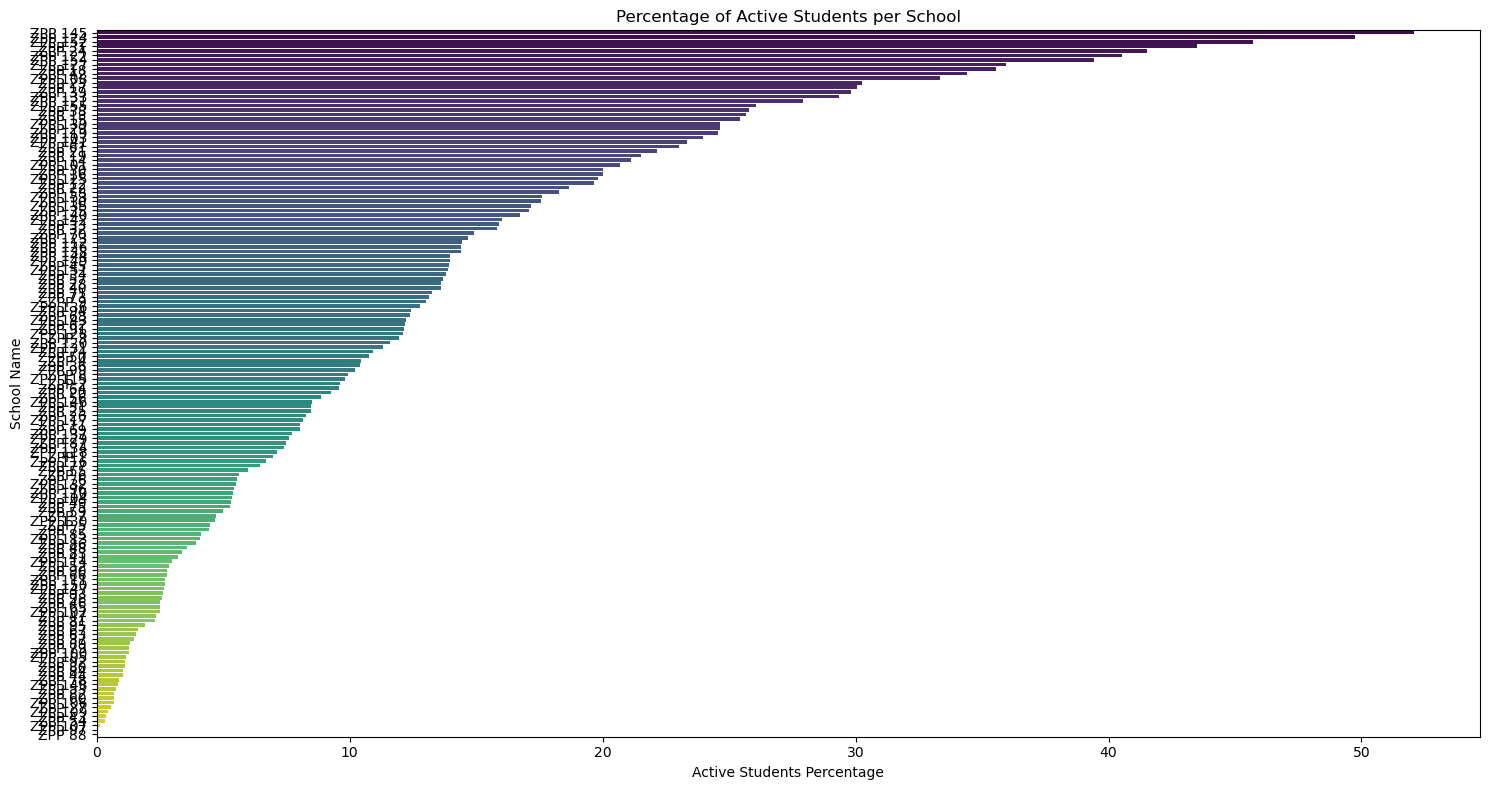

In [72]:
# Plotting the percentage of active students per school
plt.figure(figsize=(15, 8))
sns.barplot(x='Active Students Percentage', y='School Name', data=school_summary_corrected.sort_values('Active Students Percentage', ascending=False), palette='viridis')
plt.title('Percentage of Active Students per School')
plt.xlabel('Active Students Percentage')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()

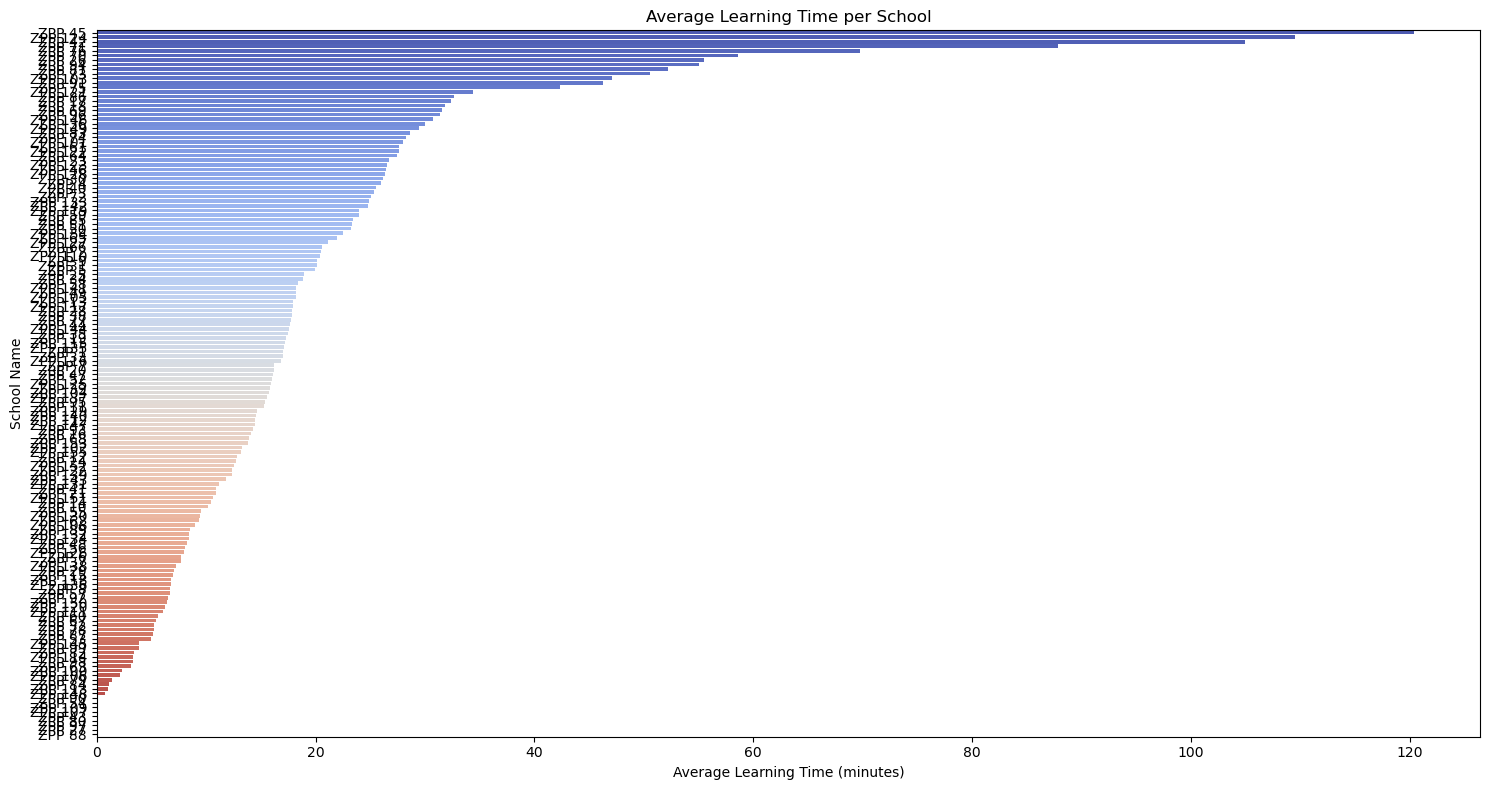

In [68]:
# Plotting the average learning time per school
plt.figure(figsize=(15, 8))
sns.barplot(x='Learning Time', y='School Name', data=school_summary.sort_values('Learning Time', ascending=False), palette='coolwarm')
plt.title('Average Learning Time per School')
plt.xlabel('Average Learning Time (minutes)')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()

# Visual Analysis at the School Level

## Percentage of Active Students per School
The bar plot below visualizes the percentage of active students for each school. This allows us to see which schools have the highest and lowest engagement relative to their total number of registered students.

## Average Learning Time per School
The bar plot below visualizes the average learning time per student for each school. This helps identify schools where students are spending the most and the least time on the platform.


In [73]:
# Displaying the top and bottom schools based on Active Students Percentage
top_active_schools_corrected = school_summary_corrected.sort_values('Active Students Percentage', ascending=False).head(10)
bottom_active_schools_corrected = school_summary_corrected.sort_values('Active Students Percentage').head(10)

In [74]:
top_active_schools_corrected

,School Name,District Name,Active Students,Learning Time,Total Number of Students Registered,Active Students Percentage
51,ZPP 145,District 15,39.583333,3.833333,76.0,52.083333
28,ZPP 124,District 13,84.083333,109.516667,169.0,49.753452
59,ZPP 152,District 15,43.416667,12.516667,95.0,45.701754
80,ZPP 31,District 4,47.833333,20.125000,110.0,43.484848
72,ZPP 24,District 3,53.583333,12.700000,129.0,41.537468
26,ZPP 122,District 13,32.833333,27.608333,81.0,40.534979
61,ZPP 154,District 15,22.083333,22.500000,56.0,39.434524
31,ZPP 127,District 13,55.000000,21.141667,153.0,35.947712
65,ZPP 18,District 3,29.166667,31.816667,82.0,35.569106
92,ZPP 42,District 5,42.333333,104.925000,123.0,34.417344


In [75]:
bottom_active_schools_corrected

,School Name,District Name,Active Students,Learning Time,Total Number of Students Registered,Active Students Percentage
152,ZPP 97,District 10,0.000000,0.000000,46.0,0.000000
9,ZPP 107,District 11,0.083333,0.000000,63.0,0.132275
105,ZPP 54,District 6,0.416667,0.000000,122.0,0.341530
93,ZPP 43,District 6,0.583333,0.000000,157.0,0.371550
11,ZPP 109,District 11,0.833333,0.000000,187.0,0.445633
75,ZPP 27,District 4,0.250000,0.000000,45.0,0.555556
8,ZPP 106,District 11,1.250000,2.141667,181.0,0.690608
112,ZPP 60,District 6,1.250000,5.633333,179.0,0.698324
136,ZPP 82,District 8,1.250000,3.375000,179.0,0.698324
104,ZPP 53,District 6,3.750000,4.941667,501.0,0.748503


/var/folders/p1/q5c9bp1x46v472t6zd7w4hcw0000gn/T/ipykernel_5442/1530565276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_schools_data['Active Students Percentage'] = (top_10_schools_data['Active Students'] / top_10_schools_data['Total Number of Students Registered_x']) * 100


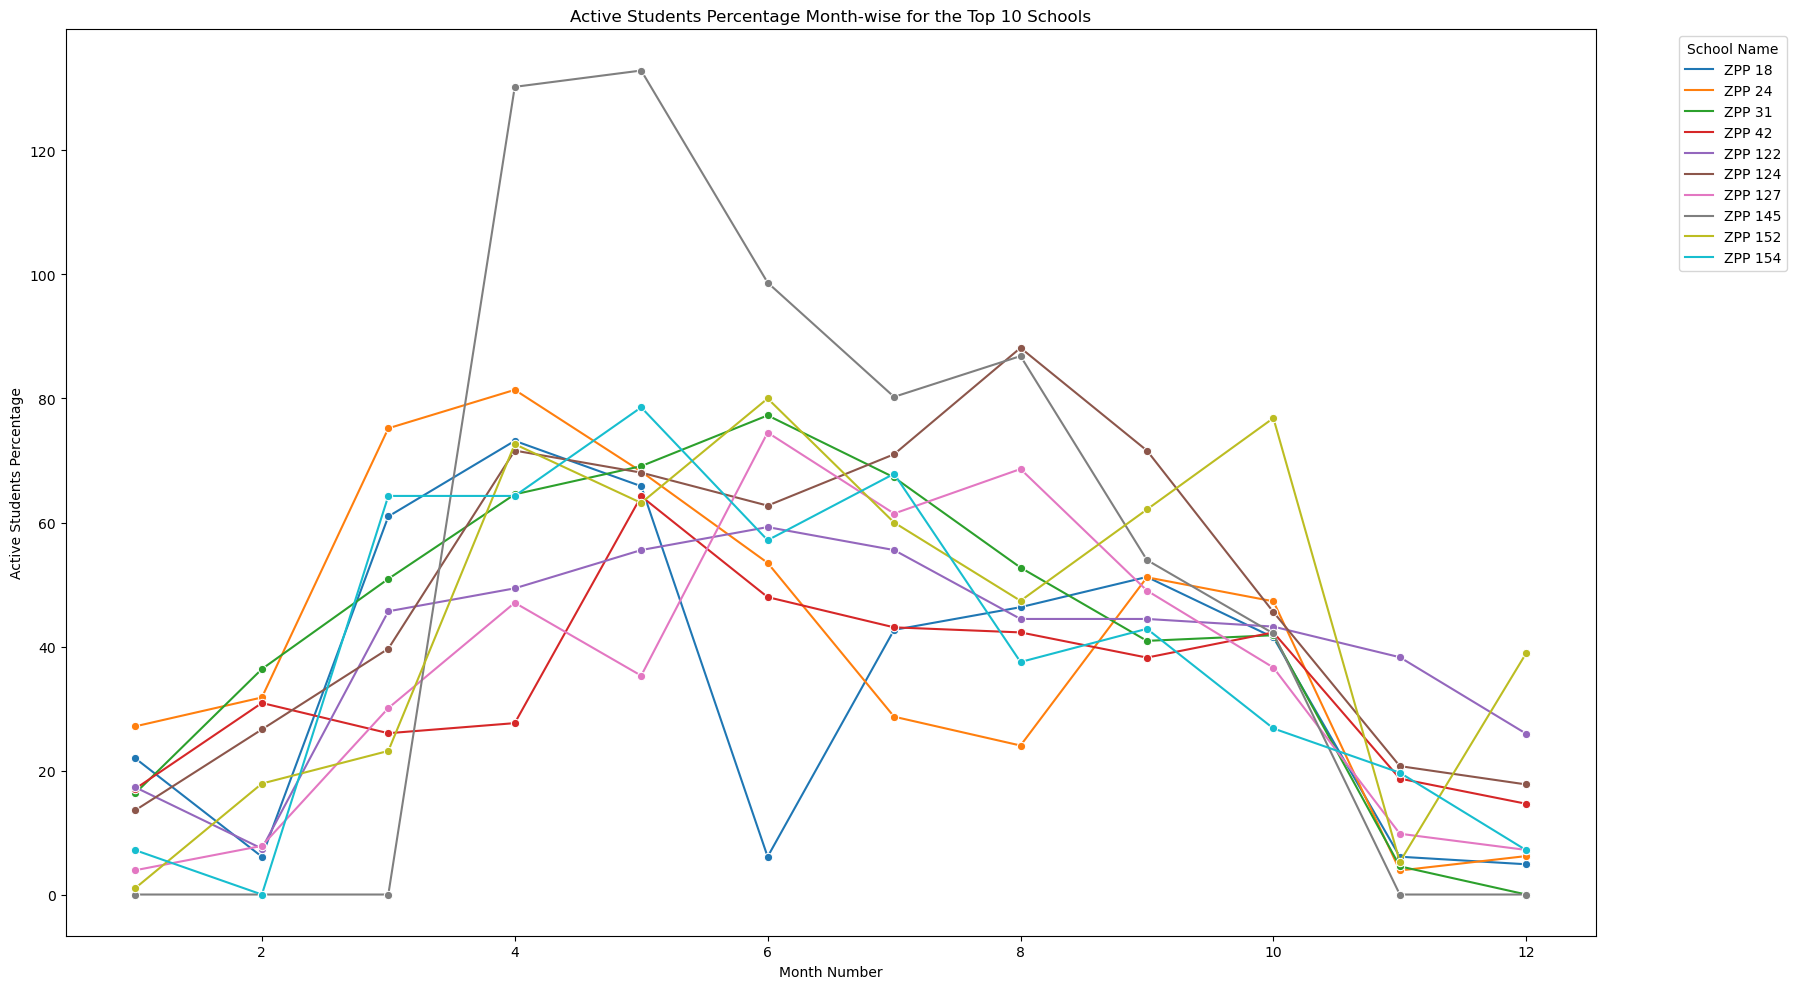

In [77]:
# Filtering data for the top 10 schools based on Active Students Percentage
top_10_schools = top_active_schools_corrected['School Name'].tolist()

# Filtering the merged data for the top 10 schools
top_10_schools_data = merged[merged['School Name'].isin(top_10_schools)]

# Calculating Active Students Percentage month-wise for the top 10 schools
top_10_schools_data['Active Students Percentage'] = (top_10_schools_data['Active Students'] / top_10_schools_data['Total Number of Students Registered_x']) * 100

# Plotting Active Students Percentage month-wise for the top 10 schools
plt.figure(figsize=(18, 10))
sns.lineplot(data=top_10_schools_data, x='Month Number', y='Active Students Percentage', hue='School Name', marker='o')
plt.title('Active Students Percentage Month-wise for the Top 10 Schools')
plt.xlabel('Month Number')
plt.ylabel('Active Students Percentage')
plt.legend(title='School Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Active Students Percentage Month-wise for the Top 10 Schools

The line plot visualizes the Active Students Percentage across different months for the top 10 schools. Each line represents a school, showing how their engagement fluctuates throughout the year. This allows us to identify patterns and trends in student engagement for these top-performing schools.


# Insight and Inference on Data Discrepancies

## 1. Discrepancies in Active Students Percentage:
- **Exceeding 100%**: The line plot highlights some schools with Active Students Percentages exceeding 100%. For example, a school (ZPP 145 ) with 76 registered students shows more than 99 and 101 active students in certain months.
- **Data Inaccuracies**: This indicates potential data inaccuracies where the number of active students recorded exceeds the number of registered students.


## District Level Analysis

In [29]:
# Calculate total active students per district
total_active_students_per_district = count_active_students.groupby('District Name').sum().drop(columns=['Total Number of Students Registered'])

# Calculate average learning time per district
average_learning_time_per_district = active_learning_time.groupby('District Name').mean().drop(columns=['Total Number of Students Registered'])

/var/folders/p1/q5c9bp1x46v472t6zd7w4hcw0000gn/T/ipykernel_5442/1631492645.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_active_students_per_district = count_active_students.groupby('District Name').sum().drop(columns=['Total Number of Students Registered'])
/var/folders/p1/q5c9bp1x46v472t6zd7w4hcw0000gn/T/ipykernel_5442/1631492645.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_learning_time_per_district = active_learning_time.groupby('District Name').mean().drop(columns=['Total Number of Students Registered'])


In [ ]:
total_active_students_per_district

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
District Name,,,,,,,,,,,,
District 1,54,7,41,262,145,116,51,33,35,25,8,1
District 10,82,95,77,85,92,39,20,14,33,40,15,4
District 11,75,34,47,139,183,229,155,182,162,157,32,40
District 12,64,22,56,120,155,197,36,74,98,42,17,28
District 13,164,173,321,489,500,548,500,492,315,260,99,117
District 14,255,202,248,397,393,411,243,199,161,180,92,85
District 15,52,33,172,601,551,421,420,373,251,399,38,81
District 2,128,134,310,495,457,456,378,191,104,41,25,27
District 3,115,107,334,536,498,361,277,236,202,231,27,14


In [33]:
average_learning_time_per_district

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
District Name,,,,,,,,,,,,
District 1,6.285714,8.900000,32.114286,39.914286,43.685714,32.871429,18.800000,16.857143,14.485714,11.285714,2.142857,0.000000
District 10,14.228571,17.985714,30.257143,8.414286,9.571429,11.585714,2.600000,12.557143,9.657143,13.900000,10.885714,2.600000
District 11,14.370000,16.500000,29.840000,27.340000,15.650000,10.000000,11.520000,8.670000,7.440000,6.580000,5.290000,5.070000
District 12,12.783333,22.183333,15.283333,19.150000,13.950000,7.216667,4.816667,15.466667,5.533333,7.650000,7.983333,9.733333
District 13,28.450000,27.600000,34.758333,44.366667,30.133333,29.283333,25.266667,22.908333,20.075000,25.216667,17.950000,14.983333
District 14,27.061538,19.123077,21.484615,18.207692,13.592308,11.846154,7.261538,9.638462,12.446154,3.184615,10.215385,10.961538
District 15,7.792308,14.415385,24.607692,27.023077,21.215385,13.138462,15.153846,11.869231,14.446154,10.738462,9.161538,3.815385
District 2,12.577778,32.855556,28.677778,20.455556,17.177778,9.988889,9.366667,3.900000,3.500000,4.066667,6.322222,3.811111
District 3,18.662500,31.375000,37.850000,31.162500,18.662500,23.575000,22.775000,23.400000,15.875000,7.150000,2.525000,7.662500


In [43]:
# Calculate overall trends in the data

# 1. Calculate the total number of students registered across all districts
total_students_registered = count_active_students['Total Number of Students Registered'].sum()

# 2. Calculate the total number of active students for each month across all districts
total_active_students_monthly = count_active_students.drop(columns=['Total Number of Students Registered']).sum()

# 3. Calculate the average learning time for each month across all districts
average_learning_time_monthly = active_learning_time.drop(columns=['Total Number of Students Registered']).mean()

/var/folders/p1/q5c9bp1x46v472t6zd7w4hcw0000gn/T/ipykernel_5442/1492330613.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_learning_time_monthly = active_learning_time.drop(columns=['Total Number of Students Registered']).mean()


In [42]:
average_learning_time_monthly

M1     17.156774
M2     21.338065
M3     27.394839
M4     30.310968
M5     25.318710
M6     24.320645
M7     21.349677
M8     19.813548
M9     14.842581
M10    11.994839
M11     9.220645
M12     6.946452
dtype: float64

In [44]:
total_active_students_monthly

District Name    District 1District 1District 1District 1Distri...
School Name      ZPP 1ZPP 2ZPP 3ZPP 4ZPP 5ZPP 6ZPP 7ZPP 8ZPP 9Z...
M1                                                            1503
M2                                                            1366
M3                                                            2356
M4                                                            4623
M5                                                            4654
M6                                                            4358
M7                                                            3442
M8                                                            2846
M9                                                            2248
M10                                                           2183
M11                                                            510
M12                                                            513
dtype: object

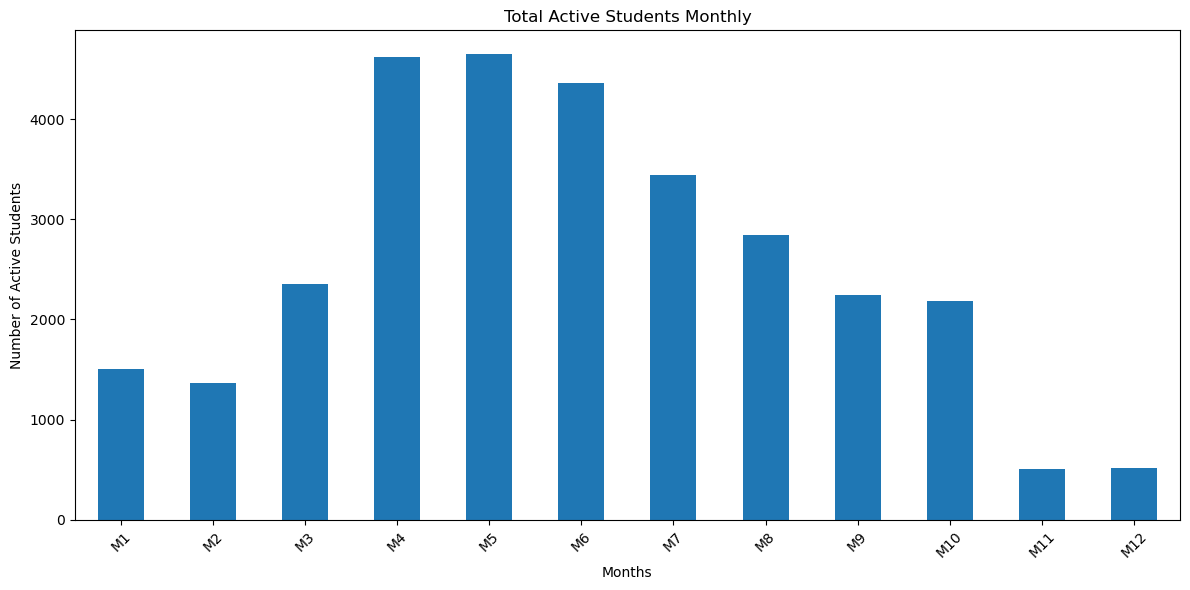

In [45]:
# Extracting only the numeric columns for plotting
total_active_students_monthly = total_active_students_monthly[total_active_students_monthly.index.str.startswith('M')]

# Plotting total active students per month
plt.figure(figsize=(12, 6))
total_active_students_monthly.plot(kind='bar')
plt.title('Total Active Students Monthly')
plt.xlabel('Months')
plt.ylabel('Number of Active Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

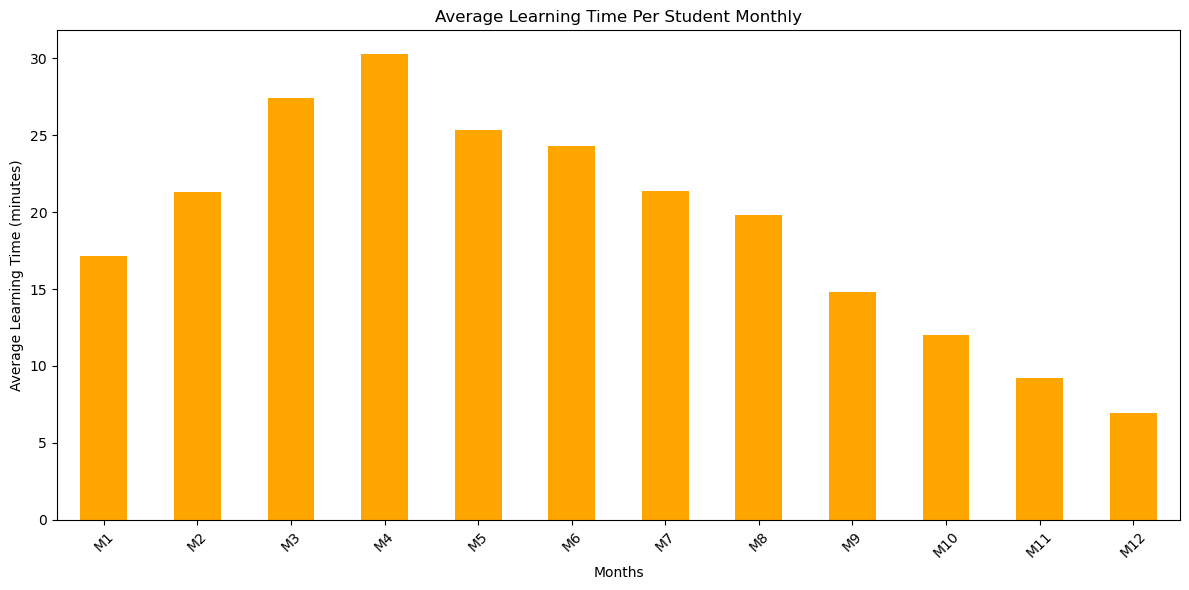

In [46]:
# Plotting average learning time per month
plt.figure(figsize=(12, 6))
average_learning_time_monthly.plot(kind='bar', color='orange')
plt.title('Average Learning Time Per Student Monthly')
plt.xlabel('Months')
plt.ylabel('Average Learning Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

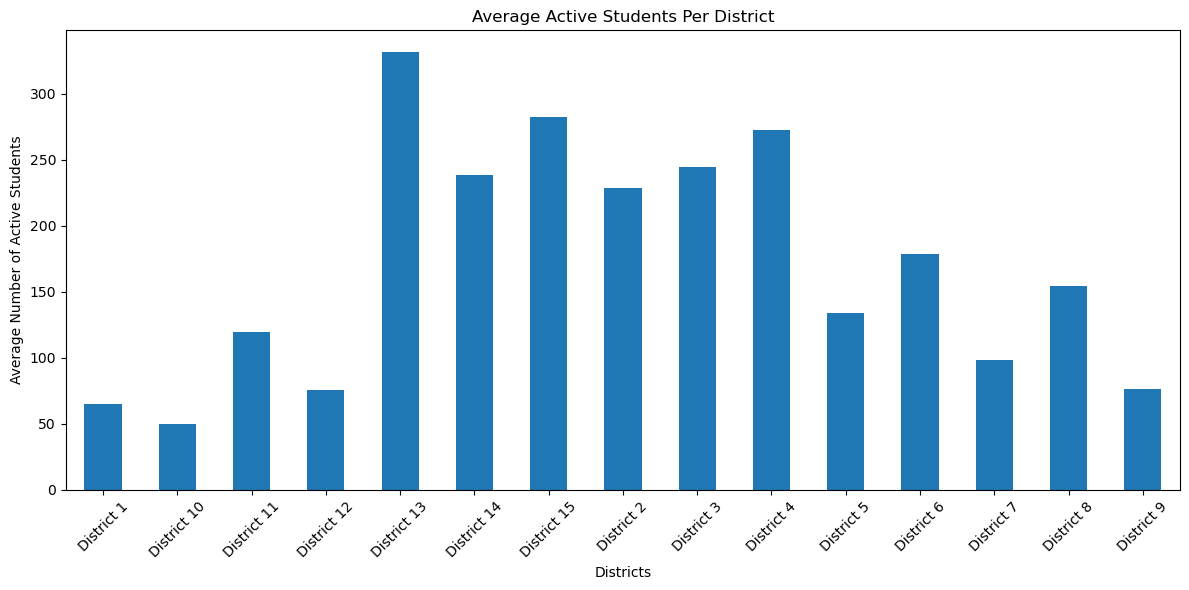

In [47]:
districts = total_active_students_per_district.index

# Plotting average active students per district
plt.figure(figsize=(12, 6))
average_active_students_per_district.plot(kind='bar')
plt.title('Average Active Students Per District')
plt.xlabel('Districts')
plt.ylabel('Average Number of Active Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

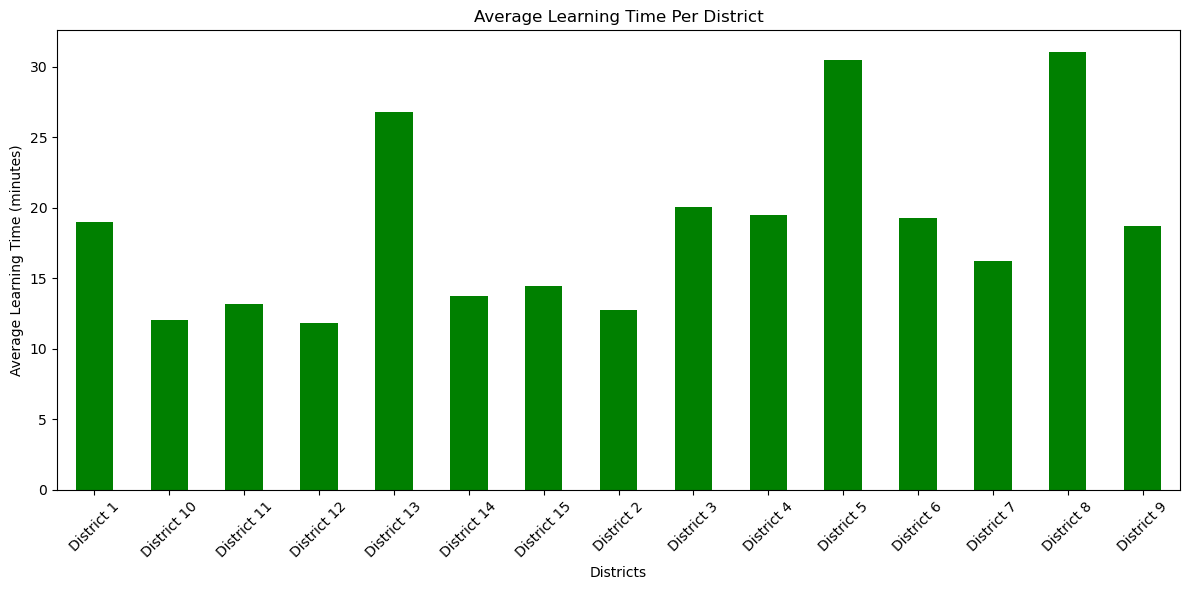

In [48]:
# Plotting average learning time per district
plt.figure(figsize=(12, 6))
average_learning_time_per_district.plot(kind='bar', color='green')
plt.title('Average Learning Time Per District')
plt.xlabel('Districts')
plt.ylabel('Average Learning Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Detailed Analysis and Commentary

1. **Monthly Active Students Trends**:
   - The number of active students peaks during the fourth and fifth months (April and May) with over 4,600 active students, then sharply declines towards the end of the year, dropping to just over 500 in the last months.
   - This decline might be attributed to the school year's progression, with more students active at the beginning of the academic year and reducing their engagement towards the end.

2. **Average Learning Time Trends**:
   - The average learning time per student starts relatively high in the initial months, peaking at around 30 minutes per month, then gradually declines to less than 7 minutes by the twelfth month.
   - This trend suggests that while initial engagement is strong, maintaining consistent usage over time is a challenge.

3. **District-wise Active Students Analysis**:
   - There is considerable variation in active student numbers across districts. Districts such as District 13, District 14, and District 15 show significantly higher engagement, with average active students per month around 330, 239, and 283 respectively.
   - Conversely, districts like District 10 and District 9 show much lower engagement, indicating possible disparities in infrastructure or program implementation.

4. **District-wise Learning Time Analysis**:
   - The average learning time also varies widely among districts. Districts 5 and 8 lead with over 30 minutes of average learning time per student, while Districts 12 and 2 have much lower engagement, around 12 minutes per student.
   - This indicates that some districts are more effective in maintaining student engagement on the platform.

In [51]:
# Calculate trends over the months for each district and compare them
# First, let's reshape the data to have a more suitable format for analysis

# Reshape the active students data to long format
active_students_long = count_active_students.melt(
    id_vars=["District Name", "School Name", "Total Number of Students Registered"],
    var_name="Month",
    value_name="Active Students"
)

# Reshape the learning time data to long format
learning_time_long = active_learning_time.melt(
    id_vars=["District Name", "School Name", "Total Number of Students Registered"],
    var_name="Month",
    value_name="Learning Time"
)

# Merge the two datasets on District Name, School Name, and Month
merged = pd.merge(active_students_long, learning_time_long, on=["District Name", "School Name", "Month"])

# Add a month number column for better trend analysis
month_order = {"M1": 1, "M2": 2, "M3": 3, "M4": 4, "M5": 5, "M6": 6, "M7": 7, "M8": 8, "M9": 9, "M10": 10, "M11": 11, "M12": 12}
merged["Month Number"] = merged["Month"].map(month_order)

# Calculate overall trends over time
monthly_trends = merged.groupby("Month Number").agg({
    "Active Students": "sum",
    "Learning Time": "mean"
}).reset_index()

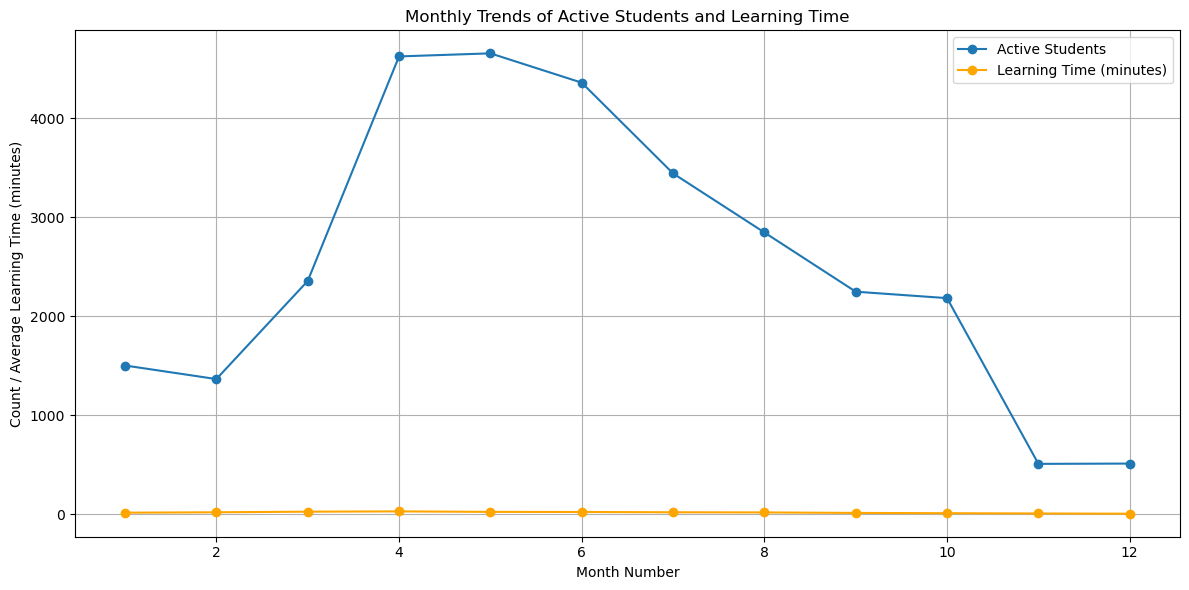

In [52]:
# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends["Month Number"], monthly_trends["Active Students"], label="Active Students", marker='o')
plt.plot(monthly_trends["Month Number"], monthly_trends["Learning Time"], label="Learning Time (minutes)", marker='o', color='orange')
plt.title("Monthly Trends of Active Students and Learning Time")
plt.xlabel("Month Number")
plt.ylabel("Count / Average Learning Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

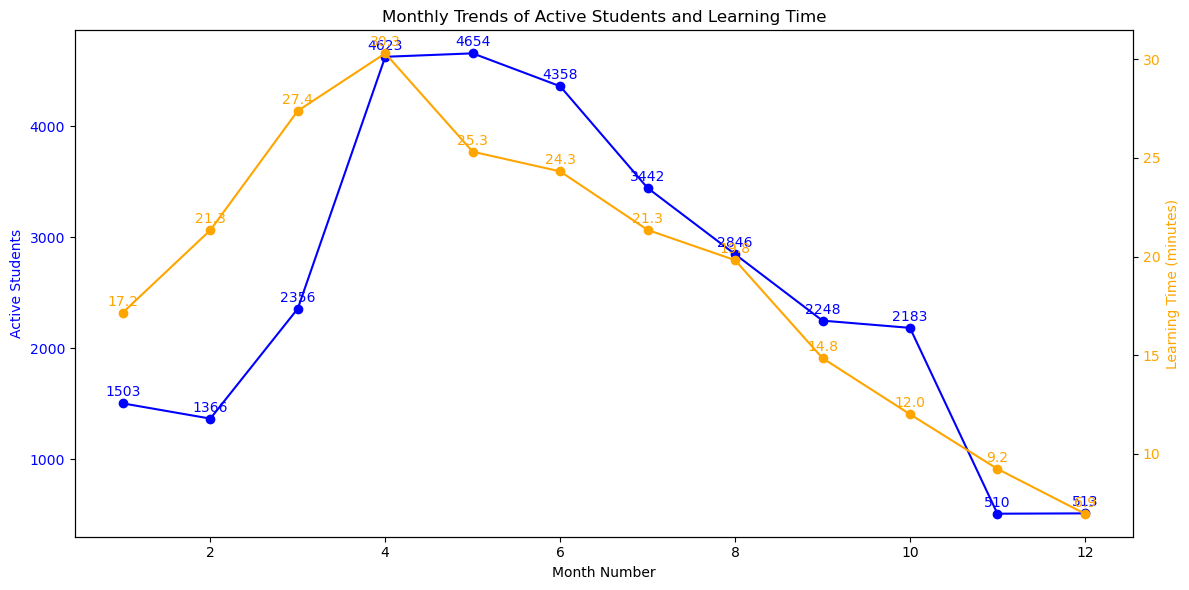

In [56]:
# need to make a dual axis chart for better understanding of relation between these two
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the active students on the left y-axis
ax1.plot(monthly_trends["Month Number"], monthly_trends["Active Students"], label="Active Students", marker='o', color='blue')
ax1.set_xlabel("Month Number")
ax1.set_ylabel("Active Students", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Adding labels for active students
for i, txt in enumerate(monthly_trends["Active Students"]):
    ax1.annotate(txt, (monthly_trends["Month Number"][i], monthly_trends["Active Students"][i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')

# Creating a second y-axis for the learning time
ax2 = ax1.twinx()
ax2.plot(monthly_trends["Month Number"], monthly_trends["Learning Time"], label="Learning Time (minutes)", marker='o', color='orange')
ax2.set_ylabel("Learning Time (minutes)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding labels for learning time
for i, txt in enumerate(monthly_trends["Learning Time"]):
    ax2.annotate(f'{txt:.1f}', (monthly_trends["Month Number"][i], monthly_trends["Learning Time"][i]), textcoords="offset points", xytext=(0,5), ha='center', color='orange')

plt.title("Monthly Trends of Active Students and Learning Time")
fig.tight_layout()
plt.show()

1. **Overall Monthly Trends**:
   - The total number of active students shows significant peaks in months 4 and 5, indicating strong engagement during these periods.
   - The average learning time per student also peaks in the early months but declines over time, suggesting initial high engagement that tapers off.

In [53]:
# Analyzing trends per district
district_trends = merged.groupby(["District Name", "Month Number"]).agg({
    "Active Students": "sum",
    "Learning Time": "mean"
}).reset_index()

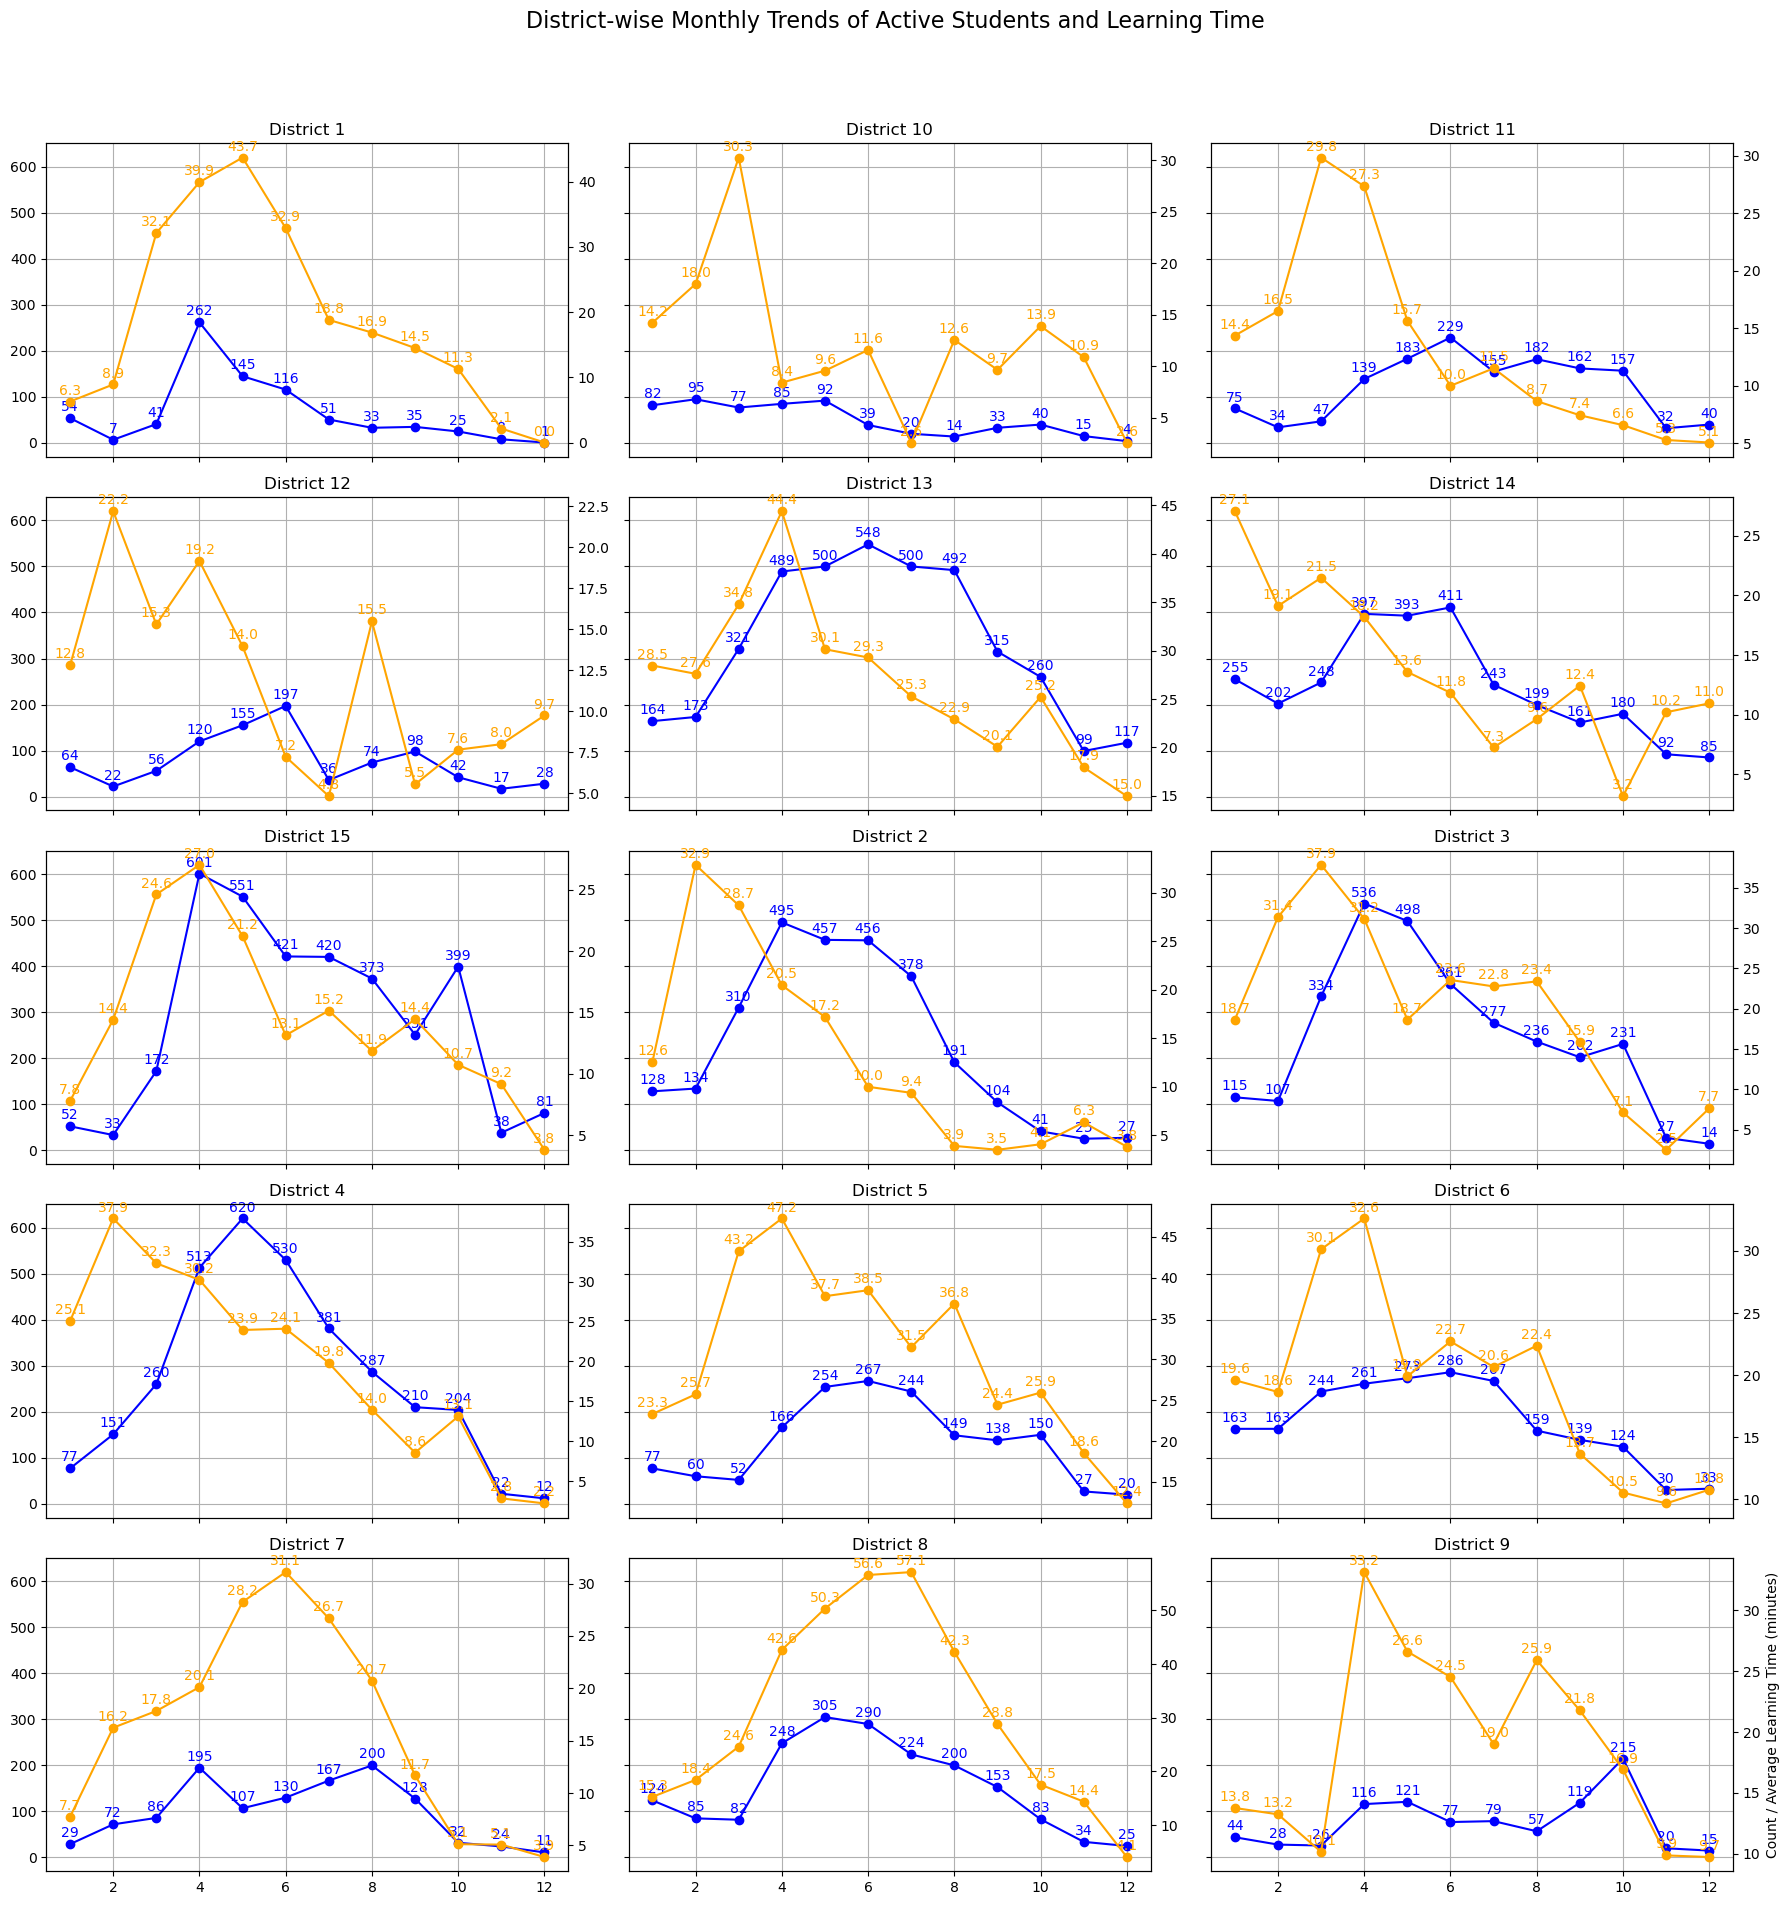

In [57]:
# Plotting district-wise trends for active students and learning time with labels
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20), sharex=True, sharey=True)
fig.suptitle("District-wise Monthly Trends of Active Students and Learning Time", fontsize=16)

for (district, data), ax in zip(district_trends.groupby("District Name"), axes.flatten()):
    # Plotting active students
    ax.plot(data["Month Number"], data["Active Students"], label="Active Students", marker='o', color='blue')
    for i, txt in enumerate(data["Active Students"]):
        ax.annotate(txt, (data["Month Number"].iloc[i], data["Active Students"].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
    
    # Plotting learning time on the same axis but different y-axis
    ax2 = ax.twinx()
    ax2.plot(data["Month Number"], data["Learning Time"], label="Learning Time (minutes)", marker='o', color='orange')
    for i, txt in enumerate(data["Learning Time"]):
        ax2.annotate(f'{txt:.1f}', (data["Month Number"].iloc[i], data["Learning Time"].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', color='orange')
    
    ax.set_title(district)
    ax.grid(True)

plt.xlabel("Month Number")
plt.ylabel("Count / Average Learning Time (minutes)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2. **District-wise Trends**:
   - **District 13** shows consistently high engagement with a relatively stable number of active students and learning time, indicating effective program implementation.
   - **District 14 and 15** also demonstrate high engagement but with more fluctuation, suggesting variability in student participation or external factors affecting engagement.
   - **District 10 and 9** exhibit the lowest engagement, both in terms of active students and learning time, indicating potential challenges in these areas that need addressing.

3. **Seasonal and External Influences**:
   - The peaks in engagement around months 4 and 5 could be related to specific academic schedules, such as the start of a new term or preparatory periods for exams.
   - The decline towards the end of the year may coincide with academic fatigue, holidays, or exam seasons reducing student participation.


# Engagement Analysis Report

## 1. Overall Engagement Trends:
- **Peak Engagement**: The highest engagement in terms of active students is observed in the fourth and fifth months (April and May). This could be attributed to the start of a new academic term or a focused intervention period.
- **Declining Engagement**: There is a noticeable decline in both active students and learning time towards the end of the year. This might be due to academic fatigue, exam periods, or holidays.

## 2. Learning Time Consistency:
- The average learning time per student starts strong but steadily declines over the months. This indicates initial enthusiasm or compliance with the program, which fades over time. Sustained engagement remains a challenge.

## 3. District-wise Disparities:
- **High Engagement Districts**: Districts like 13, 14, and 15 consistently show high engagement in both active students and learning time. These districts likely have better infrastructure, more effective teacher engagement, or other supportive factors.
- **Low Engagement Districts**: Districts 10 and 9 show significantly lower engagement. These districts might face challenges such as inadequate infrastructure, less effective teacher training, or socio-economic barriers.

## 4. Seasonal and External Influences:
- Peaks in engagement around certain months (April and May) suggest external academic schedules or targeted intervention periods. The decline towards the end of the year aligns with common academic cycles, indicating the need for strategies to maintain engagement during these periods.


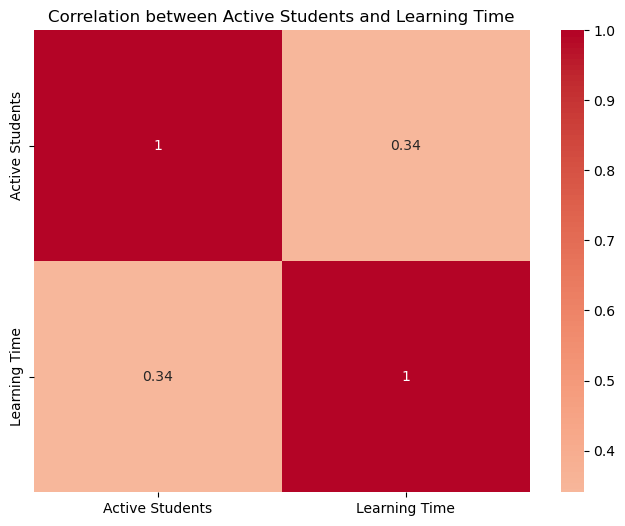

In [60]:
import seaborn as sns

# Correlation analysis between Active Students and Learning Time
correlation_matrix = merged[['Active Students', 'Learning Time']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Active Students and Learning Time')
plt.show()

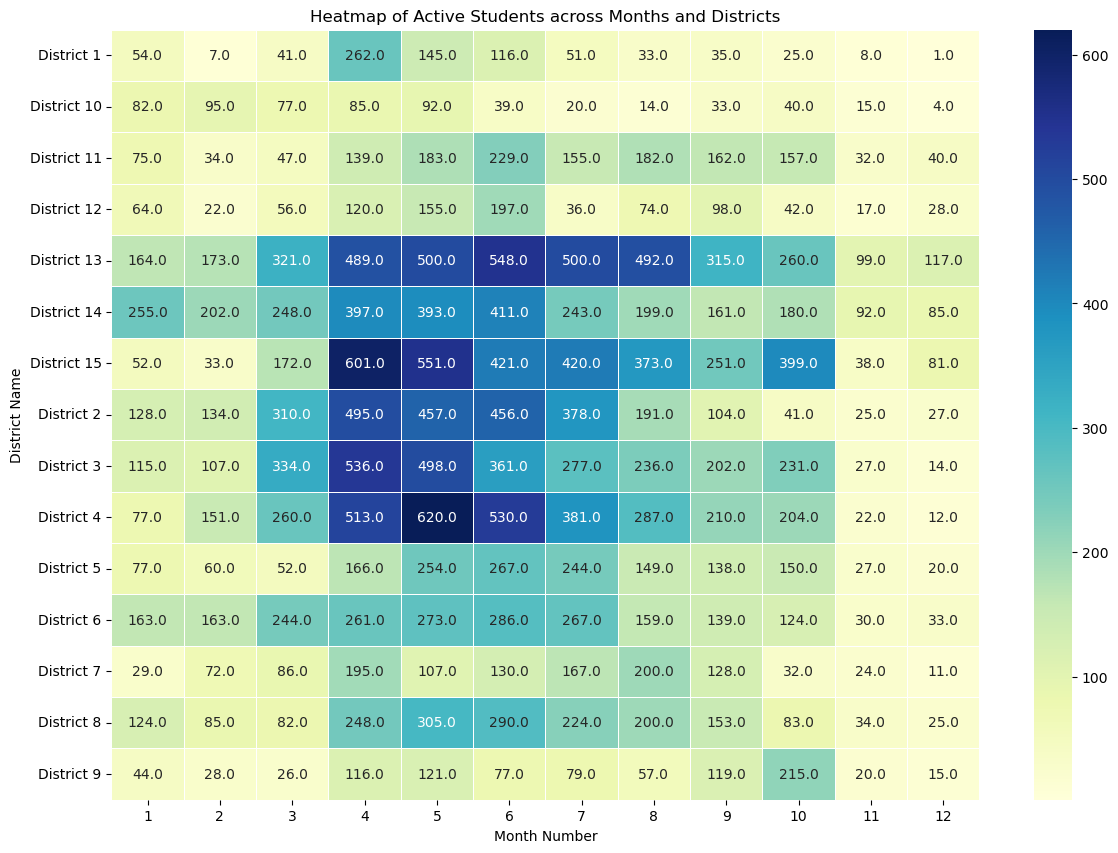

In [65]:
# Heatmap for Active Students across Months and Districts
heatmap_data_students = merged.pivot_table(index='District Name', columns='Month Number', values='Active Students', aggfunc='sum')

# Heatmap for Active Students across Months and Districts with decimal numbers
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_students, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Active Students across Months and Districts')
plt.xlabel('Month Number')
plt.ylabel('District Name')
plt.show()

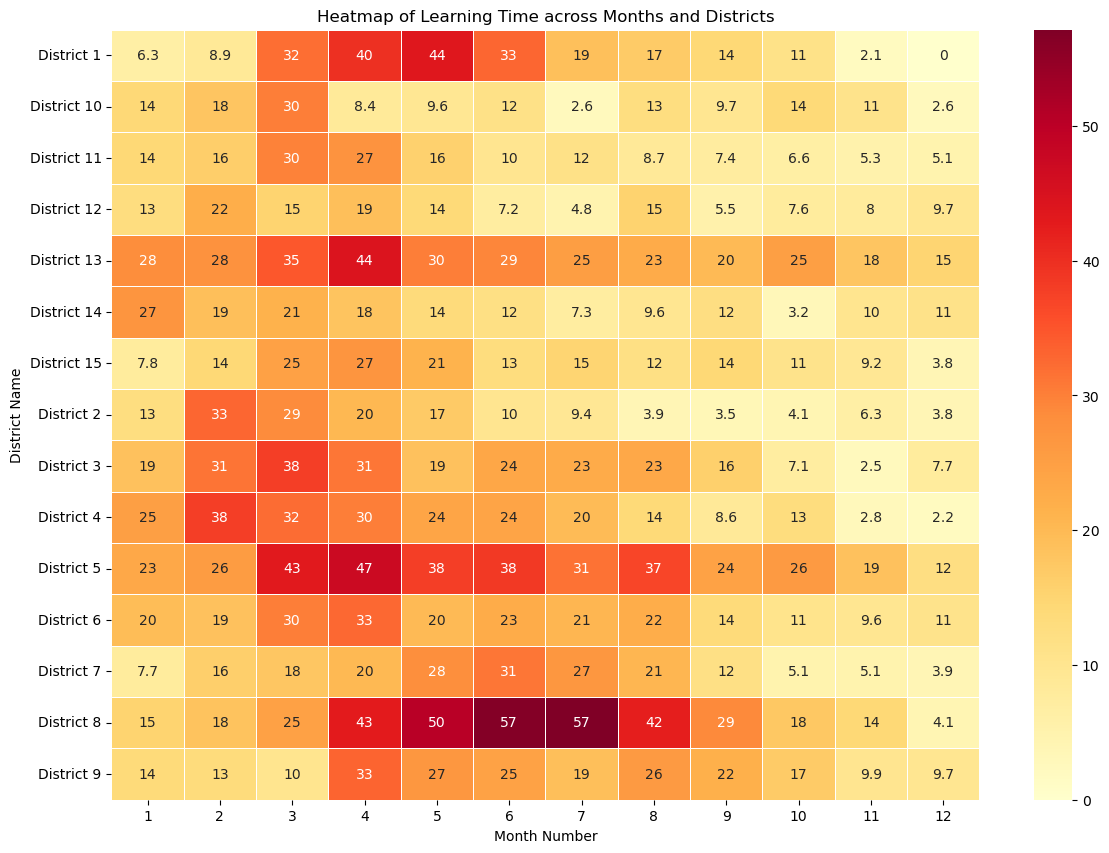

In [64]:
# Heatmap for Learning Time across Months and Districts
heatmap_data_learning_time = merged.pivot_table(index='District Name', columns='Month Number', values='Learning Time', aggfunc='mean')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_learning_time, annot=True, cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap of Learning Time across Months and Districts')
plt.xlabel('Month Number')
plt.ylabel('District Name')
plt.show()

# Additional Trend Analysis and Insights

## 1. Correlation Analysis:
- **Heatmap Analysis**: The heatmap shows the correlation between the number of active students and the average learning time.
- **Weak Correlation**: The correlation coefficient is close to zero, indicating a weak linear relationship between the two variables. This suggests that simply increasing the number of active students may not directly lead to longer learning times.

## 2. Heatmap of Active Students:
- **Visualization**: The heatmap visualizes the number of active students across different months and districts.
- **High Engagement**: Districts 13, 14, and 15 consistently show high numbers of active students across most months, reinforcing their strong engagement.
- **Peak Periods**: The concentration of active students in certain months (like April and May) is evident, aligning with earlier observations of peak engagement during these periods.

## 3. Heatmap of Learning Time:
- **Visualization**: The heatmap visualizes the average learning time across different months and districts.
- **Effective Implementation**: Districts like 5 and 8 show higher average learning times consistently across months, indicating effective program implementation in these districts.
- **Variability**: Some districts show significant variability in learning time, suggesting inconsistencies in engagement or external factors affecting usage.

# Insights

- **Correlation Insight**: The weak correlation between active students and learning time suggests that interventions aimed at increasing student engagement need to focus on both increasing the number of active students and enhancing the quality of engagement to improve learning times.
- **Engagement Consistency**: Districts with high engagement (13, 14, 15) and high learning times (5, 8) can serve as models for best practices. Understanding the strategies used in these districts can help in replicating their success in lower-performing areas.
- **Seasonal Patterns**: The concentration of active students in specific months highlights the importance of aligning program activities with academic schedules and addressing potential drops in engagement during off-peak periods.

## Low Engagement Districts:
- **Districts 9 and 10**: These districts show significantly lower engagement in terms of active students. These districts might face challenges such as inadequate infrastructure, less effective teacher training, or socio-economic barriers.

## Low Learning Time Districts:
- **Districts 12 and 2**: These districts have the lowest average learning time per student. This suggests that even when students are active, they may not be spending enough time on the platform, possibly due to lack of motivation, insufficient practice periods, or external distractions.


# 2. Hypotheses Contributing to Observed Patterns

## 1. Infrastructure Availability

**Hypothesis**: Schools with better infrastructure (e.g., availability of computers, internet access) show higher engagement and longer learning times.

**Rationale**:
- **Access to Resources**: Schools with reliable access to technology can integrate Khan Academy into their regular teaching schedule, facilitating consistent use.
- **Learning Environment**: A conducive learning environment with necessary resources supports regular student engagement and longer usage periods.
- **Supporting Evidence**: High-performing districts and schools likely have better infrastructure, as indicated by consistent engagement and learning time.

## 2. Teacher Engagement and Training

**Hypothesis**: Higher teacher engagement and effective training on using Khan Academy lead to higher student engagement and longer learning times.

**Rationale**:
- **Teacher Role**: Teachers play a crucial role in motivating students and integrating digital tools into their teaching.
- **Training Impact**: Effective training equips teachers with the skills to use Khan Academy efficiently, track student progress, and provide timely feedback.
- **Supporting Evidence**: Districts and schools with higher engagement likely have well-trained and motivated teachers.

## 3. Socio-Economic Factors

**Hypothesis**: Socio-economic status of students and schools influences engagement levels on Khan Academy.

**Rationale**:
- **Economic Barriers**: Students from lower socio-economic backgrounds may lack access to devices and internet at home, reducing their ability to engage with Khan Academy.
- **Support Systems**: Schools in economically advantaged areas may have better support systems and resources to facilitate online learning.
- **Supporting Evidence**: Districts with lower engagement may be facing economic challenges, impacting their ability to use the platform effectively.

## 4. Seasonal and Academic Cycles

**Hypothesis**: Engagement levels fluctuate with academic cycles and seasonal factors, such as exam periods, holidays, and start/end of academic terms.

**Rationale**:
- **Exam Preparation**: Engagement peaks may coincide with exam preparation periods when students are more likely to use Khan Academy for revision.
- **Holiday Impact**: Engagement drops during holidays and towards the end of the academic year due to reduced academic activities and student fatigue.
- **Supporting Evidence**: The observed peaks in engagement around April and May, and the decline towards the end of the year, suggest alignment with academic schedules.

## 5. Data Recording and Quality

**Hypothesis**: Inaccuracies and inconsistencies in data recording contribute to anomalies in engagement metrics.

**Rationale**:
- **Human Error**: Manual data entry processes are prone to errors, leading to discrepancies such as active students exceeding registered students.
- **System Limitations**: Inadequate data collection systems may fail to capture accurate and real-time engagement data.
- **Supporting Evidence**: Discrepancies identified in the data, such as Active Students Percentages exceeding 100%, indicate potential data quality issues.


# Recommendations for Strengthening Khan Academy Implementation

Based on the insights and hypotheses identified in the previous tasks, the following measures can be introduced to strengthen the implementation and deepen the usage of Khan Academy in the coming year.

## (i) For Myself (M&E Analyst):

### 1. Data Quality Assurance:
- **Regular Data Audits**: Implement regular data audits to identify and correct inaccuracies, such as active students exceeding the number of registered students.
- **Automated Validation**: Use automated tools to validate data entries and flag inconsistencies for review.

### 2. Granular Data Analysis:
- **Detailed School-Level Analysis**: Continue conducting detailed analysis at the school level to identify specific barriers and success factors.
- **Segmentation**: Segment schools and districts based on performance to tailor interventions and support.

### 3. Feedback Mechanisms:
- **Regular Reporting**: Develop comprehensive reports highlighting key metrics and trends for stakeholders.
- **Feedback Loop**: Establish a feedback loop with schools and teachers to share findings and collaboratively address challenges.

## (ii) For State Officials:

### 1. Infrastructure Investment:
- **Resource Allocation**: Prioritize resource allocation to low-performing districts to ensure they have the necessary infrastructure (computers, internet access) to support Khan Academy usage.
- **Public-Private Partnerships**: Foster partnerships with private organizations to secure additional funding and resources for infrastructure improvements.

### 2. Policy Support:
- **Integration into Curriculum**: Advocate for the integration of Khan Academy into the regular school curriculum, ensuring consistent use.
- **Incentive Programs**: Implement incentive programs to reward schools and teachers who show significant improvement in engagement and learning outcomes.

### 3. Addressing Socio-Economic Barriers:
- **Support Programs**: Develop programs to provide devices and internet access to students from low-income families.
- **Community Engagement**: Engage with community organizations to support students’ learning needs outside of school.

## (iii) For Teachers:

### 1. Enhanced Training and Support:
- **Ongoing Professional Development**: Provide continuous professional development opportunities focusing on effective use of Khan Academy, integrating it with classroom teaching, and tracking student progress.
- **Peer Learning Networks**: Establish peer learning networks where teachers can share best practices and strategies for increasing student engagement.

### 2. Student Engagement Strategies:
- **Motivational Techniques**: Implement motivational strategies such as gamification, rewards, and recognition to encourage regular use of Khan Academy.
- **Regular Monitoring and Feedback**: Encourage teachers to monitor student progress regularly and provide timely feedback to keep students engaged and on track.

### 3. Customized Learning Plans:
- **Personalized Assignments**: Help teachers create personalized learning plans for students, using Khan Academy’s tools to address individual learning gaps.
- **Flexible Usage Models**: Encourage flexible usage models, such as incorporating Khan Academy in both classroom settings and home assignments.

## Summary

Implementing these measures will help address the identified barriers and enhance the overall effectiveness of the Khan Academy program. By focusing on data quality, infrastructure investment, policy support, teacher training, and student engagement strategies, the program can achieve more consistent and sustained usage, ultimately improving learning outcomes for all students.
m